<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 200px; display: inline" alt="Python"/></a> [pour Statistique et Science des Données](https://github.com/wikistat/Intro-Python)

# Apprentissage Statistique / Machine avec <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 150px; display: inline" alt="Python"/></a> & <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 180px; display: inline" alt="Scikit-Learn"/></a>
**Résumé**: Ce calepin introduit l'utilisation de la librairie `scikit-learn` pour la modélisation et l'apprentissage. Pourquoi utiliser `scikit-learn` ? Ou non ? Liste des fonctionnalités, quelques exemples de mise en oeuvre de modélisation ([régression logistique](http://wikistat.fr/pdf/st-m-app-rlogit.pdf), [$k$-plus proches voisins](http://wikistat.fr/pdf/st-m-app-add.pdf), [arbres de décision](http://wikistat.fr/pdf/st-m-app-cart.pdf), [forêts aléatoires](http://wikistat.fr/pdf/st-m-app-agreg.pdf). Optimisation des paramètres (complexité) des modèles par [validation croisée](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf). Fontions de chaînage (*pipeline*) de transformations et estimations. D'autres fonctionalités de `Scikit-learn` sont abordées dans les calepins du [dépot sur l'apprentissage](https://github.com/wikistat/Apprentissage) statistique. 

## 1 Introduction
### 1.1 `Scikit-learn` *vs.*  R
L'objectif de ce tutoriel est d'introduire l'utilisation de la librairie `scikit-learn` de Python. Seule l'utilisation directe des fonctions de modélisation sont abordées d'une manière analogue à la mise en oeuvre de R dont les librairies offrent l'accès à bien plus de méthodes. La comparaison avec R repose sur les remarques suivantes.

- Cette librairie manipule des objets de classe `array` de `numpy` *chargés en mémoire* et donc de taille limitée par la RAM de l'ordinateur; de façon analogue R charge en RAM des objets de type `data.frame`.
- `Scikit-learn` (0.18) ne reconnaît pas (ou pas encore ?) la classe `DataFrame` de `pandas`; `scikit-learn` utilise la classe `array` de `numpy`. C'est un problème pour la gestion de variables qualitatives complexes. Une variable binaire est simplement remplacée par un codage *(0,1)* mais, en présence de plusieurs modalités, traiter celles-ci comme des entiers n'a pas de sens statistique et remplacer une variable qualitative par l'ensemble des indicatrices (*dummy variables (0,1)*) de ses modalités  complique les stratégies de sélection de modèle tout en rendant inexploitable l'interprétation statistique. 
- Les implémentations en Python de certains algorithmes dans `scikit-learn` sont souvent plus efficaces et utilisent implicitement les capacités de parallélisation.
- R offre beaucoup plus de possibilités pour la comparaison de modèles statistiques et leur interprétation. 

En conséquences:
- Préférer R et ses librairies si la présentation des résultats et surtout leur interprétation (modèles) est prioritaire, si  l'utilisation et / ou la comparaison de beaucoup de méthodes est recherchée.
- Préférer Python et `scikit-learn` pour mettre au point une chaîne de traitements (*pipe line*) opérationnelle de l'extraction à une analyse privilégiant la prévision brute à l'interprétation et pour des données quantitatives ou rendues quantitatives ("vectorisation" de corpus de textes).

En revanche, si les données sont trop volumineuses pour la taille du disque et distribuées sur les n\oe uds d'un *cluster* avec *Hadoop*, consulter les [calepins](https://github.com/wikistat/Ateliers-Big-Data/tree/master/1-Intro-PySpark) sur l'utilisation de *Spark*.


### 1.2 Fonctions d'apprentissage de `Scikit-learn`
La communauté qui développe cette librairie est très active et la fait évoluer rapidement.  Ne pas hésiter à consulter la [documentation](http://scikit-learn.org/stable/user_guide.html) pour des compléments. Voici une sélection de ses principales fonctionnalités en lien avec la modélisation.

- Transformations (standardisation, discrétisation binaire, regroupement de modalités, imputations rudimentaires de données manquantes) , "vectorisation" de corpus de textes (encodage, catalogue, Tf-idf), images;
- Modéle linéaire général avec pénalisation (ridge, lasso, elastic net...), analyse discriminante linéaire et quadratique,  $k$ plus proches voisins,  processus gaussiens, classifieur bayésien naïf, arbres de régression et classification (CART), agrégation de modèles (bagging, random forest, adaboost, gradient tree boosting), perceptron multicouche (réseau de neurones), SVM (classification, régression, détection d'atypiques...);
- Algorithmes de validation croisée (loo, k-fold, VC stratifiée...) et sélection de modèles, optimisation sur une grille de paramètres, séparation aléatoire apprentissage et test, courbe ROC;
- Enchaînement (*pipeline*) de traitements.

En résumé, cette librairie est focalisée sur les aspects "machine" de l'apprentissage de données quantitatives (séries, signaux, images) volumineuses tandis que R intègre l'analyse de variables qualitatives complexes et l'interprétation statistique fine des résultats au détriment parfois de l'efficacité des calculs.

### 1.3 Objectif
L'objectif est d'illustrer la mise en oeuvre de quelques fonctionnalités. Consulter la [documentation](http://scikit-learn.org/stable/user_guide.html) et ses nombreux [exemples](http://scikit-learn.org/stable/auto_examples/index.html) pour plus de détails sur les possibilités d'utilisation de `scikit-learn`. 

Deux jeux de données élémentaires sont utilisés. Celui [déjà étudié](https://github.com/wikistat/Intro-Python) avec `pandas` et concernant le naufrage du Titanic. Il mélange des variables explicatives qualitatives et quantitatives dans un objet de la classe `DataFrame`. Pour être utilisé dans `scikit-learn` les données doivent être transformées en un objet de classe `Array` de `numpy` par le  remplacement des variables qualitatives par les indicatrices de leurs modalités.  L'autre ensemble de données est entièrement quantitatif. C'est un problème classique et simplifié de [reconnaissance de caractères](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits) qui est inclus dans la librairie `scikit-learn`.

Après la phase d'exploration ([calepin précédent](https://github.com/wikistat/Intro-Python)), ce sont les fonctions de modélisation et apprentissage qui sont abordées: [régression logistique](http://wikistat.fr/pdf/st-m-app-rlogit.pdf) (titanic), [$k$- plus proches voisins](http://wikistat.fr/pdf/st-m-app-add.pdf) (caractères), [arbres de discrimination](http://wikistat.fr/pdf/st-m-app-cart.pdf), et [forêts aléatoires](http://wikistat.fr/pdf/st-m-app-agreg.pdf). Les paramètres de complexité des modèles  sont optimisés par minimisation de l'[erreur de prévision](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf) estimée par [validation croisée](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf) *V-fold$.  

D'autres fonctionnalités sont rapidement illustrées : enchaînement (*pipeline*) de méthodes et automatisation, détection d'observations atypiques. Leur maîtrise est néanmoins importante pour la mise en exploitation de codes complexes efficaces.

## 2 Extraction des échantillons
Le travail préliminaire consiste à séparer les échantillons en une partie *apprentissage* et une autre de *test* pour estimer sans biais l'[erreur de prévision](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf). L'optimisation (biais-variance) de la complexité des modèles est réalisée en minimisant l'erreur estimée par [validation croisée](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf) $V-fold$. 

### 2.1 Données "Caractères"
Elles sont disponibles dans la librairie `Scikit-learn`.

In [1]:
# Importations 
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
# les données
digits = datasets.load_digits()
# Contenu et mode d'obtention
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

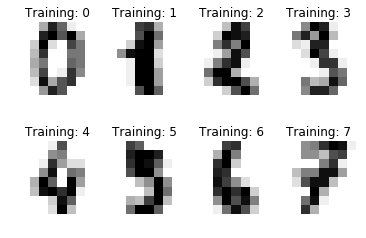

In [2]:
images_and_labels = list(zip(digits.images, 
   digits.target))
for index, (image, label) in  enumerate(images_and_labels[:8]):
     plt.subplot(2, 4, index + 1)
     plt.axis('off')
     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
     plt.title('Training: %i' % label)

In [3]:
# variables prédictives et cible
X=digits.data
y=digits.target

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=11)

### 2.2 Données "Titanic"

Les données sur le naufrage du Titanic sont décrites dans le calepin consacré à la librairie *pandas*. Reconstruire la table des données en lisant le fichier .csv.

In [5]:
# Lire les données d'apprentissage
import pandas as pd
path=''  # si les données sont déjà dans le répertoire courant
# path='http://www.math.univ-toulouse.fr/~besse/Wikistat/data/'
df=pd.read_csv(path+'titanic-train.csv',skiprows=1,header=None,usecols=[1,2,4,5,9,11],
  names=["Surv","Classe","Genre","Age","Prix","Port"],dtype={"Surv":object,"Classe":object,"Genre":object,"Port":object})
df.head()

,Surv,Classe,Genre,Age,Prix,Port
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [6]:
df.shape # dimensions
# Redéfinir les types 
df["Surv"]=pd.Categorical(df["Surv"],ordered=False)
df["Classe"]=pd.Categorical(df["Classe"],ordered=False)
df["Genre"]=pd.Categorical(df["Genre"],ordered=False)
df["Port"]=pd.Categorical(df["Port"],ordered=False)
df.dtypes

Surv      category
Classe    category
Genre     category
Age        float64
Prix       float64
Port      category
dtype: object

In [7]:
df.count()

Surv      891
Classe    891
Genre     891
Age       714
Prix      891
Port      889
dtype: int64

In [8]:
# imputation des valeurs manquantes
df["Age"]=df["Age"].fillna(df["Age"].median())
df.Port=df["Port"].fillna("S")

In [9]:
# Discrétiser les variables quantitatives
df["AgeQ"]=pd.qcut(df.Age,3,labels=["Ag1","Ag2","Ag3"])
df["PrixQ"]=pd.qcut(df.Prix,3,labels=["Pr1","Pr2","Pr3"])
# redéfinir les noms des modalités 
df["Surv"]=df["Surv"].cat.rename_categories(["Vnon","Voui"])
df["Classe"]=df["Classe"].cat.rename_categories(["Cl1","Cl2","Cl3"])
df["Genre"]=df["Genre"].cat.rename_categories(["Gfem","Gmas"])
df["Port"]=df["Port"].cat.rename_categories(["Pc","Pq","Ps"])
df.head()

,Surv,Classe,Genre,Age,Prix,Port,AgeQ,PrixQ
0,Vnon,Cl3,Gmas,22.0,7.2500,Ps,Ag1,Pr1
1,Voui,Cl1,Gfem,38.0,71.2833,Pc,Ag3,Pr3
2,Voui,Cl3,Gfem,26.0,7.9250,Ps,Ag2,Pr1
3,Voui,Cl1,Gfem,35.0,53.1000,Ps,Ag3,Pr3
4,Vnon,Cl3,Gmas,35.0,8.0500,Ps,Ag3,Pr1


Il est nécessaire de transformer les données car `scikit-learn` ne reconnaît pas la classe `DataFrame` de `pandas`, ce qui est bien dommage. Les variables qualitatives sont comme précédemment remplacées par les indicatrices de leurs modalités et les variables quantitatives conservées. Cela introduit une évidente redondance dans les données mais les procédures de sélection de modèle feront le tri.

In [10]:
# Table de départ
df.head()

,Surv,Classe,Genre,Age,Prix,Port,AgeQ,PrixQ
0,Vnon,Cl3,Gmas,22.0,7.2500,Ps,Ag1,Pr1
1,Voui,Cl1,Gfem,38.0,71.2833,Pc,Ag3,Pr3
2,Voui,Cl3,Gfem,26.0,7.9250,Ps,Ag2,Pr1
3,Voui,Cl1,Gfem,35.0,53.1000,Ps,Ag3,Pr3
4,Vnon,Cl3,Gmas,35.0,8.0500,Ps,Ag3,Pr1


In [11]:
# Construction des indicatrices
df_q=df.drop(["Age","Prix"],axis=1)
df_q.head()
# Indicatrices
dc=pd.DataFrame(pd.get_dummies(df_q[["Surv","Classe","Genre","Port","AgeQ","PrixQ"]]))
dc.head()

,Surv_Vnon,Surv_Voui,Classe_Cl1,Classe_Cl2,Classe_Cl3,Genre_Gfem,Genre_Gmas,Port_Pc,Port_Pq,Port_Ps,AgeQ_Ag1,AgeQ_Ag2,AgeQ_Ag3,PrixQ_Pr1,PrixQ_Pr2,PrixQ_Pr3
0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0
1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1
2,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0
3,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1
4,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0


In [12]:
# Table des indicatrices
df1=pd.get_dummies(df_q[["Surv","Classe","Genre","Port","AgeQ","PrixQ"]])
# Une seule indicatrice par variable binaire
df1=df1.drop(["Surv_Vnon","Genre_Gmas"],axis=1)
# Variables quantitatives
df2=df[["Age","Prix"]]
# Concaténation
df_c=pd.concat([df1,df2],axis=1)
# Vérification
df_c.columns

Index(['Surv_Voui', 'Classe_Cl1', 'Classe_Cl2', 'Classe_Cl3', 'Genre_Gfem',
       'Port_Pc', 'Port_Pq', 'Port_Ps', 'AgeQ_Ag1', 'AgeQ_Ag2', 'AgeQ_Ag3',
       'PrixQ_Pr1', 'PrixQ_Pr2', 'PrixQ_Pr3', 'Age', 'Prix'],
      dtype='object')

Extraction des échantillons d'apprentissage et test.

In [13]:
# variables explicatives
T=df_c.drop(["Surv_Voui"],axis=1)
# Variable à modéliser
z=df_c["Surv_Voui"]
# Extractions
from sklearn.model_selection import train_test_split
T_train,T_test,z_train,z_test=train_test_split(T,z,test_size=0.2,random_state=11)

**Attention**: l'échantillon test des données "Titanic" est relativement petit, l'estimation de l'erreur de prévision est donc sujette à caution car probablement de grande variance. Il suffit de changer l'initialisation (paramètre ` random_state`) et ré-exécuter les scripts pour s'en assurer. 

## 3 *K* plus proches voisins
Les images des caractères sont codées par des variables  quantitatives. Le problème de reconnaissance de forme ou de discrimination est adapté à l'algorithme des  [$k$-plus proches voisins](http://wikistat.fr/pdf/st-m-app-add.pdf). Le paramètre à optimiser pour contrôler la complexité du modèle est le nombre de voisin `n_neighbors`. Les autres options sont décrites dans la [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
digit_knn=knn.fit(X_train, y_train) 
# Estimation de l'erreur de prévision
# sur l'échantillon test
1-digit_knn.score(X_test,y_test)

0.02444444444444449

Optimisation du paramètre de complexité du modèle par validation croisée en cherchant l'erreur minimale sur une grille de valeurs du paramètre avec `cv=5`-*fold cross validation* et `n_jobs=-1` pour une exécution en parallèle utilisant tous les processeurs sauf 1. Attention, comme la validation croisée est aléatoire, deux exécutions successives ne donnent pas le même résultat.

In [15]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs
param=[{"n_neighbors":list(range(1,15))}]
knn= GridSearchCV(KNeighborsClassifier(),param,cv=5,n_jobs=-1)
digit_knnOpt=knn.fit(X_train, y_train)
# paramètre optimal
digit_knnOpt.best_params_["n_neighbors"]

4

Le modèle `digit_knnOpt` est déjà estimé avec la valeur "optimale" du paramètre.

In [16]:
# Estimation de l'erreur de prévision sur l'échantillon test
1-digit_knnOpt.score(X_test,y_test)

0.01777777777777778

col_0   0   1   2   3   4   5   6   7   8   9
row_0                                        
0      45   0   0   0   0   0   0   0   0   0
1       0  45   0   0   0   0   0   0   0   0
2       0   0  54   0   0   0   0   0   0   0
3       0   0   0  42   0   1   0   1   0   0
4       0   1   0   0  49   0   0   0   0   0
5       0   0   0   0   0  38   0   0   0   0
6       0   0   0   0   0   0  42   0   0   0
7       0   0   0   0   0   0   0  45   0   0
8       0   1   0   1   0   0   1   0  41   0
9       0   0   0   0   1   0   0   0   1  41


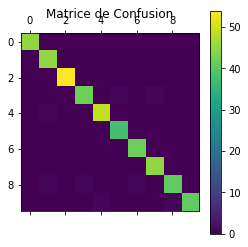

In [17]:
# Prévision
y_chap = digit_knnOpt.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_test,y_chap)
print(table)
plt.matshow(table)
plt.title("Matrice de Confusion")
plt.colorbar()
plt.show()

### 3.3 Régression logistique
La prévision de la survie, variable binaire des données "Titanic", se prêtent à une [régression logistique](http://wikistat.fr/pdf/st-m-app-rlogit.pdf). Les versions pénalisées (ridge, lasso, elastic net, lars) du modèle linéaire général sont les algorithmes les plus développés dans `Scikit-learn` au détriment de ceux plus classiques (*forward, backward, step-wise*) de sélection de variables en optimisant un critère de type AIC.  Une version lasso de la régression logistique est testée afin d'introduire la sélection automatique des variables.

Estimation et erreur de prévision du modèle complet sur l'échantillon test.

In [18]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
titan_logit=logit.fit(T_train, z_train)
# Erreur sur l'écahntillon test
1-titan_logit.score(T_test, z_test)

0.15642458100558654

In [19]:
# Coefficients
titan_logit.coef_ 

array([[ 1.10474584e+00,  2.44806123e-01, -1.00772649e+00,
         2.36633837e+00,  2.96069260e-01,  2.09534901e-01,
        -1.63778683e-01, -4.45469320e-01,  2.25735063e-02,
         7.64721291e-01,  1.78388521e-01,  1.15911373e-01,
         4.75255845e-02, -5.82015170e-02,  1.93517205e-04]])

Comme pour le modèle linéaire, il faudrait construire les commandes d'aide à l'interprétation des résultats.

Pénalisation et optimisation du paramètre par validation croisée. Il existe une fonction spécifique mais son mode d'emploi est peu documenté; `GridSearchCV` lui est préférée.

In [ ]:
# grille de valeurs
param=[{"C":[0.01,0.096,0.098,0.1,0.12,1,10]}]
logit = GridSearchCV(LogisticRegression(penalty="l1"),
   param,cv=5,n_jobs=-1)
titan_logitOpt=logit.fit(T_train, z_train)
# paramètre optimal
titan_logitOpt.best_params_["C"]

Estimation de l'erreur de prévision par le modèle "optimal".

In [ ]:
# Erreur sur l'échantillon test
1-titan_logitOpt.score(T_test, z_test)

Petit souci supplémentaire, l'objet produit par `GridSearchCV` ne connaît pas l'attribut `.coef_`. Il faut donc ré-estimer le modèle pour connaître les coefficients.

In [ ]:
# Estimation avec le paramètre optimal et coefficients
LogisticRegression(penalty="l1",C=titan_logitOpt.best_params_['C']).fit(T_train, z_train).coef_

Commenter : parcimonie du modèle vs. erreur de prévision.

## 4 Arbre de décision
### 4.1 Implémentation
Les [arbres binaires de décision](http://wikistat.fr/pdf/st-m-app-cart.pdf) (CART: *classification and regression trees*) s'appliquent à tous types de variables. Les options de l'algorithme sont décrites dans la [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). La complexité du modèle est gérée par deux paramètres : `max_depth`, qui détermine le nombre max de feuilles dans l'arbre, et le nombre minimales `min_samples_split` d'observations requises pour rechercher une dichotomie. 

**Attention**: Même s'il s'agit d'une implémentation proche de celle originale proposée par Breiman et al. (1984) il n'existe pas (encore?) comme dans R (package `rpart`) un paramètre de pénalisation de la déviance du modèle par sa complexité (nombre de feuilles) afin de construire une séquence d'arbres emboîtés dans la perspective d'un élagage (*pruning*) optimal par validation croisée. La fonction générique de $k$-*fold cross validation* `GridSearchCV` est utilisée pour optimiser le paramètre de profondeur mais sans beaucoup de précision dans l'élagage car ce dernier élimine tout un niveau et pas les seules feuilles inutiles à la qualité de la prévision.

En revanche, l'implémentation anticipe sur celles des [méthodes d'agrégation de modèles](http://wikistat.fr/pdf/st-m-app-agreg.pdf) en intégrant les paramètres (nombre de variables tirées, importance...) qui leurs sont spécifiques. D'autre part, la représentation graphique d'un arbre n'est pas incluse et nécessite l'implémentation d'un autre logiciel libre: [Graphviz](http://www.graphviz.org/). 

Tout ceci souligne encore les objectifs de développement de cette librairie: temps de calcul et prévision brute au détriment d'une recherche d'interprétation. Dans certains exemples éventuellement pas trop compliqués, un arbre élagué de façon optimal peut en effet prévoir à peine moins bien (différence non significative) qu'une agrégation de modèles (forêt aléatoire ou **boosting**) et apporter un éclairage nettement plus pertinent qu'un algorithme de type "boîte noire". 

## 4.2 Données "Titanic"
Estimation de l'arbre complet.

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
digit_tree=tree.fit(T_train, z_train) 
# Estimation de l'erreur de prévision
1-digit_tree.score(T_test,z_test)

0.17877094972067042

Optimisation du paramètre de complexité du modèle par validation croisée en cherchant l'erreur minimale sur une grille de valeurs du paramètre avec `cv=5`-*fold cross validation* et `n_jobs=-1` pour une exécution en parallèle utilisant tous les processeurs sauf 1. Attention, comme la validation croisée est aléatoire et un arbre un modèle instable, deux exécutions successives ne donnent pas nécessairement le même résultat.

In [21]:
param=[{"max_depth":list(range(2,10))}]
titan_tree= GridSearchCV(DecisionTreeClassifier(),param,cv=5,n_jobs=-1)
titan_opt=titan_tree.fit(T_train, z_train)
# paramètre optimal
titan_opt.best_params_

{'max_depth': 6}

La valeur "optimale" du paramètre reste trop importante pour la lisibilité de l'arbre. Une valeur plus faible est utilisée.

In [22]:
tree=DecisionTreeClassifier(max_depth=3)
titan_tree=tree.fit(T_train, z_train)
# Estimation de l'erreur de prévision
# sur l'échantillon test
1-titan_tree.score(T_test,z_test)

0.12290502793296088

Noter l'amélioration de l'erreur.

In [23]:
# prévision de l'échantillon test
z_chap = titan_tree.predict(T_test)
# matrice de confusion
table=pd.crosstab(z_test,z_chap)
print(table)

col_0        0   1
Surv_Voui         
0          110   8
1           14  47


Tracer l'arbre avec le logiciel Graphviz.

In [25]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus
dot_data = StringIO() 
export_graphviz(titan_tree, out_file=dot_data) 
graph=pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("titan_tree.png")  

InvocationException: GraphViz's executables not found

L'arbre est généré dans un fichier image à visualiser pour se rende compte qu'il est plutôt mal élagué et pas directement interprétable sans les noms en clair des variables et modalités.

In [26]:
from IPython.display import Image
Image(filename='titan_tree.png')

### 4.3 Données   "Caractères"
La même démarche est utilisée pour ces données.

In [27]:
# Arbre complet
tree=DecisionTreeClassifier()
digit_tree=tree.fit(X_train, y_train) 
# Estimation de l'erreur de prévision
1-digit_tree.score(X_test,y_test)

0.14222222222222225

In [28]:
# Optimisation par validation croisée
param=[{"max_depth":list(range(5,15))}]
digit_tree= GridSearchCV(DecisionTreeClassifier(),param,cv=5,n_jobs=-1)
digit_treeOpt=digit_tree.fit(X_train, y_train)
digit_treeOpt.best_params_

{'max_depth': 12}

In [29]:
# Estimation de l'erreur de prévision
1-digit_treeOpt.score(X_test,y_test)

0.14888888888888885

In [30]:
# Echantillon test
y_chap = digit_treeOpt.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_test,y_chap)
print(table)

col_0   0   1   2   3   4   5   6   7   8   9
row_0                                        
0      40   0   0   0   1   1   1   1   1   0
1       0  42   0   0   0   0   0   0   1   2
2       1   3  44   2   1   0   0   0   3   0
3       0   2   0  35   0   3   0   1   0   3
4       0   2   0   0  42   1   1   1   2   1
5       0   0   0   0   0  36   0   0   1   1
6       0   0   0   0   3   0  39   0   0   0
7       1   1   0   1   3   1   0  37   0   1
8       1   3   1   2   0   0   0   0  36   1
9       0   0   2   2   1   3   0   2   1  32


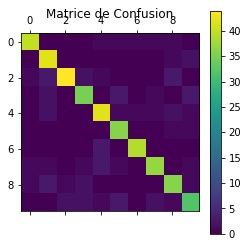

In [31]:
plt.matshow(table)
plt.title("Matrice de Confusion")
plt.colorbar()
plt.show()

Comme pour les autres méthodes, l'objet `GridSearchCV` ne contient pas tous les attibuts, dont celui `tree`, et ne permet pas de construire l'arbre. Il faudrait le ré-estimer mais comme il est bien trop complexe, ce résultat n'est pas produit.

## 5 Forêts aléatoires
L'algorithme d'agrégation de modèles le plus utilisé est celui des [forêts aléatoires](http://wikistat.fr/pdf/st-m-app-agreg.pdf) (random forest) de Breiman (2001) ce qui ne signifie pas qu'il conduit toujours à la meilleure prévision. Voir la [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) pour la signification de tous les paramètres.

Plus que le nombre d'arbres `n_estimators`, le paramètre à optimiser est le nombre de variables tirées aléatoirement pour la recherche de la division optimale d'un noeud: `max_features`. Par défaut, il prend la valeur $\frac{p}{3}$ en  régression et $\sqrt{p}$ en discrimination.
### 5.1 Données "Caractères"

In [32]:
from sklearn.ensemble import RandomForestClassifier 
# définition des paramètres
forest = RandomForestClassifier(n_estimators=500, 
   criterion='gini', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage et erreur out-of-bag
forest = forest.fit(X_train,y_train)
print(1-forest.oob_score_)

/Users/oddne/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.020044543429844075


In [33]:
# erreur de prévision sur le test
1-forest.score(X_test,y_test)

0.028888888888888853

L'optimisation du paramètre `max_features` peut être réalisée en minimisant l'erreur de prévision *out-of-bag*. Ce n'est pas prévu, il est aussi possible comme précédemment de minimiser l'erreur par validation croisée.

In [34]:
param=[{"max_features":list(range(4,64,4))}]
digit_rf= GridSearchCV(RandomForestClassifier(n_estimators=100),param,cv=5,n_jobs=-1)
digit_rfOpt=digit_rf.fit(X_train, y_train)
# paramètre optimal
digit_rfOpt.best_params_

{'max_features': 8}

Comme pour les autres méthodes, l'objet `GridSearchCV` ne propose pas tous les attributs et donc pas d'erreur *out-of-bag* ou d'importance des variables. Voir le tutoriel sur la [prévision du pic d'ozone](https://github.com/wikistat/Apprentissage/tree/master/Pic-ozone) pour plus de détails.

In [35]:
# erreur de prévision sur le test
1-digit_rfOpt.score(X_test,y_test)

0.028888888888888853

col_0   0   1   2   3   4   5   6   7   8   9
row_0                                        
0      44   0   0   0   1   0   0   0   0   0
1       0  45   0   0   0   0   0   0   0   0
2       0   0  54   0   0   0   0   0   0   0
3       0   0   0  41   0   1   0   1   1   0
4       0   0   0   0  49   0   0   1   0   0
5       0   0   0   0   0  38   0   0   0   0
6       0   0   0   0   0   0  42   0   0   0
7       0   0   0   0   0   0   0  44   0   1
8       0   2   0   1   0   0   1   1  39   0
9       0   0   0   0   0   0   0   1   1  41


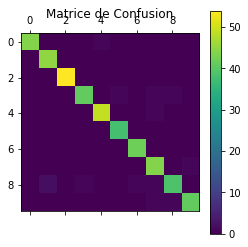

In [36]:
# prévision
y_chap = digit_rfOpt.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_test,y_chap)
print(table)
plt.matshow(table)
plt.title("Matrice de Confusion")
plt.colorbar()
plt.show()

### 5.2 Données "Titanic"
Même démarche.

In [37]:
# définition des paramètres
forest = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, 
    min_samples_split=2, min_samples_leaf=1, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=True)
# apprentissage
forest = forest.fit(T_train,z_train)
print(1-forest.oob_score_)

0.199438202247191


In [38]:
# erreur de prévision sur le test
1-forest.score(T_test,z_test)

0.13407821229050276

In [39]:
# optimisation de max_features
param=[{"max_features":list(range(2,15))}]
titan_rf= GridSearchCV(RandomForestClassifier(n_estimators=100),param,cv=5,n_jobs=-1)
titan_rfOpt=titan_rf.fit(T_train, z_train)
# paramètre optimal
titan_rfOpt.best_params_

{'max_features': 11}

In [40]:
# erreur de prévision sur le test
1-titan_rfOpt.score(T_test,z_test)

0.15083798882681565

In [41]:
# prévision
z_chap = titan_rfOpt.predict(T_test)
# matrice de confusion
table=pd.crosstab(z_test,z_chap)
print(table)

col_0        0   1
Surv_Voui         
0          107  11
1           16  45


Modifier la valeur du paramètre pour constater sa faible influence sur la qualité plutôt médiocre du résultat. 

**Attention**, comme déjà signalé, l'échantillon test est de relativement faible taille (autour de 180), il serait opportun d'itérer l'extraction aléatoire d'échantillons tests (validation croisée *Monte Carlo*)  pour tenter de réduire la variance de cette estimation et avoir une idée de sa distribution.

C'est fait dans d'autres calepins du [dépôt d'apprentissage](https://github.com/wikistat/Apprentissage).

## 6 Fonction *pipeline*
Pour enchaîner et brancher (*plugin*) plusieurs traitements, généralement des transformations suivies d'une modélisation. Utiliser les fonctionnalités de cette section sans modération afin d'optimiser la structure et l'efficacité (parallélisation) de codes complexes. 

### 6.1 Familles de transformations (*transformers*)
Classification ou régression sont souvent la dernière étape d'un procédé long et complexe. Dans la "vraie vie", les données ont besoin d'être extraites, sélectionnées, nettoyées, standardisées, complétées... (*data munging*) avant d'alimenter un algorithme d'apprentissage. Pour structurer le code, *Sciki-learn* propose d'utiliser le principe d'une API (*application programming interface*) nommée *transformer*. 

Ces fonctionnalités sont illustrées sur les mêmes données de reconnaissance de caractères. 

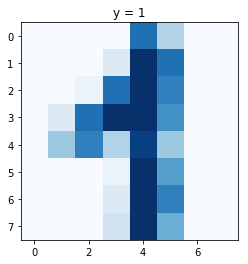

In [42]:
# Rechargement des données
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Plot
sample_id = 42
plt.imshow(X[sample_id].reshape((8, 8)), interpolation="nearest", cmap=plt.cm.Blues)
plt.title("y = %d" % y[sample_id])
plt.show()

#### Normalisations, réductions

In [43]:
import numpy as np
from sklearn.preprocessing import StandardScaler
tf = StandardScaler()
tf.fit(X_train, y_train)
Xt_train = tf.transform(X)  
print("Moyenne avant centrage et réduction =", np.mean(X_train))
print("Moyenne après centrage et réduction =", np.mean(Xt_train))
# See also Binarizer, MinMaxScaler, Normalizer, ...

Moyenne avant centrage et réduction = 4.8921213808463255
Moyenne après centrage et réduction = -0.0002048907379903124


In [44]:
# Raccourci: Xt = tf.fit_transform(X)
tf.fit_transform(X)

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [45]:
# NB. La standardisation préalable est indispensable pour certains algorithmes
# notamment les SVM
from sklearn.svm import SVC
clf = SVC()
# Calcul des scores (bien classés)
print("Sans standardisation =", clf.fit(X_train, y_train).score(X_test, y_test))
print("Avec standardisation =", clf.fit(tf.transform(X_train), y_train).score(tf.transform(X_test), y_test))

Sans standardisation = 0.4866666666666667
Avec standardisation = 0.9844444444444445


#### Sélection de variables par élimination pas à pas
La proicédure `RFE` (*récursive feature selection*) supprime une à une les variables les moins significatives ou moins importantes au sens du critère du modèle utilisé; dans cet exemple, il s'agit des forêts aléatoires.

Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 fe

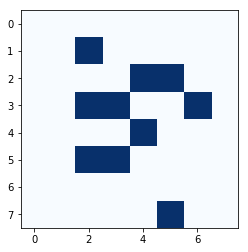

In [46]:
# Sélection de variables par élémination pas à pas
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
tf = RFE(RandomForestClassifier(), n_features_to_select=10, verbose=1)
Xt = tf.fit_transform(X_train, y_train)
print("Shape =", Xt.shape)

# Variables (pixels) sélectionnées
plt.imshow(tf.get_support().reshape((8, 8)), interpolation="nearest", cmap=plt.cm.Blues)
plt.show()

#### Décomposition, factorisation, réduction de dimension
Possibilité, par exemple, de récupérer les *q* premières composantes principales de l'ACP comme résultat d'une transformation.

In [47]:
# par ACP ou SVD
from sklearn.decomposition import PCA
tf = PCA(n_components=2)
Xt_train = tf.fit_transform(X_train)

####  Fonction  de transformation définie par l'utilisateur
Une fonction de transformation ou *transformer* est définie et s'applique à un jeu de données avec la syntaxe ci-dessous.

In [48]:
from sklearn.preprocessing import FunctionTransformer
def increment(X):
    return X + 1
tf = FunctionTransformer(func=increment)
Xt = tf.fit_transform(X)
print(X[0])
print(Xt[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[ 1.  1.  6. 14. 10.  2.  1.  1.  1.  1. 14. 16. 11. 16.  6.  1.  1.  4.
 16.  3.  1. 12.  9.  1.  1.  5. 13.  1.  1.  9.  9.  1.  1.  6.  9.  1.
  1. 10.  9.  1.  1.  5. 12.  1.  2. 13.  8.  1.  1.  3. 15.  6. 11. 13.
  1.  1.  1.  1.  7. 14. 11.  1.  1.  1.]


### 6.4 *Pipelines*

Des transformations sont chaînées en une séquence constituant un *pipeline*.

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
#tf = RFE(RandomForestClassifier(), n_features_to_select=10)
# La succession de deux transformeurs constituent un transformeur
tf = make_pipeline(StandardScaler(), RFE(RandomForestClassifier(),n_features_to_select=10))
tf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfe', RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impu...tate=None, verbose=0,
            warm_start=False),
  n_features_to_select=10, step=1, verbose=0))])

In [50]:
Xt_train = tf.transform(X_train)
print("Mean =", np.mean(Xt_train))
print("Shape =", Xt_train.shape)

Mean = -6.0662520127996674e-18
Shape = (1347, 10)


Une chaîne de transformations suivi d'un classifieur construisent un nouveau classifieur

In [51]:
clf = make_pipeline(StandardScaler(), 
                    RFE(RandomForestClassifier(), n_features_to_select=10), 
                    RandomForestClassifier())
clf.fit(X_train, y_train)
print(clf.predict_proba(X_test)[:5])

[[0.  0.  0.8 0.2 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0.9 0. ]
 [0.  0.  0.9 0.1 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.9 0.  0.1 0. ]]


In [52]:
# L'hyperparamètre est accessible
print("n_features =", clf.get_params()["rfe__estimator__n_estimators"])

n_features = 10


L'optimisation des paramètres par validation croisée est obtenue avec la même fonction mais peut prendre  du temps si plusieurs paramètres sont cocernés! Le pipeline construit à titre illustratif  n'est certainement pas optimal.

In [53]:
grid = GridSearchCV(clf, param_grid={"rfe__estimator__n_estimators": [5, 10],
                    "randomforestclassifier__max_features": [0.1, 0.25, 0.5]})
grid.fit(X_train, y_train)
print("Valeurs optimales =", grid.best_params_)

Valeurs optimales = {'randomforestclassifier__max_features': 0.5, 'rfe__estimator__n_estimators': 10}


### 6.5 Union de caractéristiques

Des transformations sont appliquées en parallèle pour réunir en un seul ensemble des transformations des données.

In [54]:
from sklearn.pipeline import make_union
from sklearn.decomposition import PCA, FastICA
tf = make_union(PCA(n_components=10), FastICA(n_components=10))
Xt_train = tf.fit_transform(X_train)
print("Shape =", Xt_train.shape)

Shape = (1347, 20)


### 6.6 Compositions emboîtées

Comme des  pipelines and des unions sont eux-mêmes des estimateurs, ils peuvent être composés dans une structure emboîtée pour construire des combinaisons complexes de modèles comme ceux remportant les concours de type [*kaggle](https://www.kaggle.com/).

Les données initiales sont unies aux composantes de l'ACP, puis les variables les plus importantes au sens des forêts aléatoires sont sélectionnées avant de servir à l'apprentissage d'un réseau de neurones. Ce n'est sûrement pas une stratégie optimale !

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

clf = make_pipeline(
    # Build features
    make_union(
        FunctionTransformer(func=lambda X: X), PCA(),), 
    # Select the best features
    RFE(RandomForestClassifier(), n_features_to_select=10),
    # Train
    MLPClassifier(max_iter=500)
)

clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x120ae4950>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y='deprecated',
          validate=True)), ('p...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])

Effectivement la combinaison n'est pas optimale:

In [56]:
# erreur de test
1-clf.score(X_test,y_test)

0.053333333333333344